In [1]:
!git clone https://github.com/hodakamori/ml-tutorial.git

Cloning into 'ml-tutorial'...
remote: Enumerating objects: 118, done.
remote: Counting objects: 100% (118/118), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 118 (delta 35), reused 96 (delta 16), pack-reused 0
Receiving objects: 100% (118/118), 13.82 MiB | 8.07 MiB/s, done.
Resolving deltas: 100% (35/35), done.


In [3]:
import pandas as pd
df = pd.read_csv('/content/ml-tutorial/data/peak_fit_example.csv')
df.head()

,Unnamed: 0,x,y
0,0,745.000000,141.064962
1,1,745.555556,105.190281
2,2,746.111111,378.071610
3,3,746.666667,108.342905
4,4,747.222222,115.598766


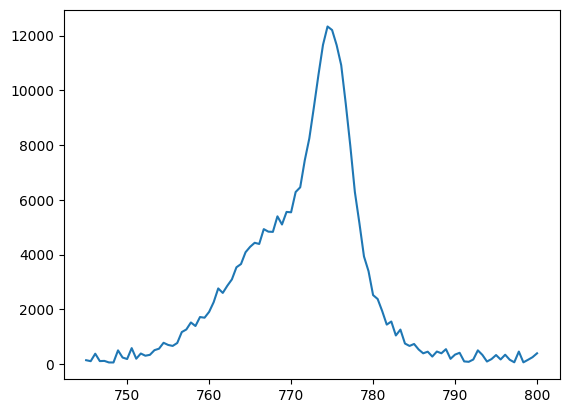

In [4]:
import matplotlib.pyplot as plt
plt.plot(df['x'], df['y'])

In [46]:
df[df["y"] == df["y"].max()]

,Unnamed: 0,x,y
53,53,774.444444,12332.377591


In [5]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

- 最適化したい関数
  - ガウス関数のパラメータ3つ(a:高さ、b:平均、c:分散)
  - 入力されるパラメータの数に応じて、用いるガウス関数の数が変わる
     - params = [1.0, 0.5, 0.1]
       - 一つのガウス関数を用いて、a=1.0, b=0.5, c=0.1
     - params = [1.0, 0.5, 0.1, 0.5, 0.2, 0.1]
       - a=1.0, b=0.5, c=0.1というガウス関数
       - a=0.5, b=0.2, c=0.1というガウス関数の二つを使う

In [32]:
def func(x, *params):
  num_func = int(len(params)/3)
  y = np.zeros_like(x)
  for i in range(num_func):
    param_range = list(range(3*i,3*(i+1)))
    a = params[int(param_range[0])]
    b = params[int(param_range[1])]
    c = params[int(param_range[2])]
    y_ = a * np.exp( -((x - b)/c)**2)
    y += y_
  return y

In [33]:
x = np.linspace(-1, 1, 100)
y = func(x, 1.0, 0.5, 0.1, 0.5, 0.2, 0.1)

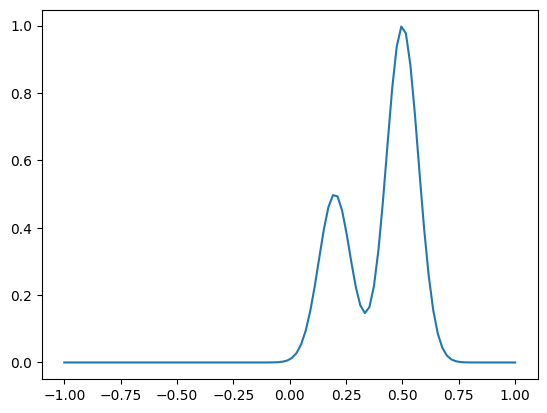

In [34]:
import matplotlib.pyplot as plt
plt.plot(x, y)

In [35]:
initial_param = [4500, 760, 10, 7500, 775, 10]

In [36]:
popt, pcov = curve_fit(func, df["x"].values, df["y"].values, p0=initial_param)

In [37]:
popt

array([5.23553209e+03, 7.70107385e+02, 1.05989568e+01, 8.06587171e+03,
       7.75009306e+02, 2.93947015e+00])

In [38]:
y_fit = func(df["x"].values, *popt)

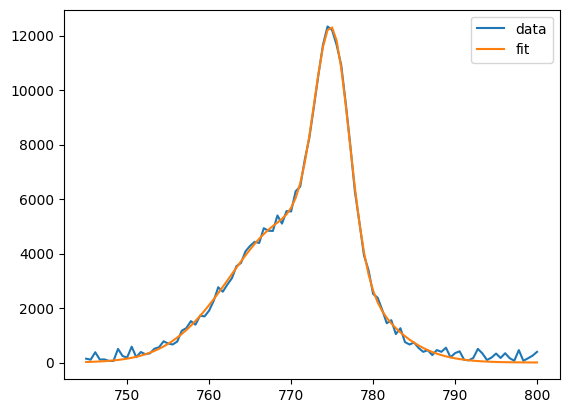

In [39]:
plt.plot(df["x"].values, df["y"].values, label="data")
plt.plot(df["x"].values, y_fit, label="fit")
plt.legend()

In [40]:
c = df["y"].values- y_fit

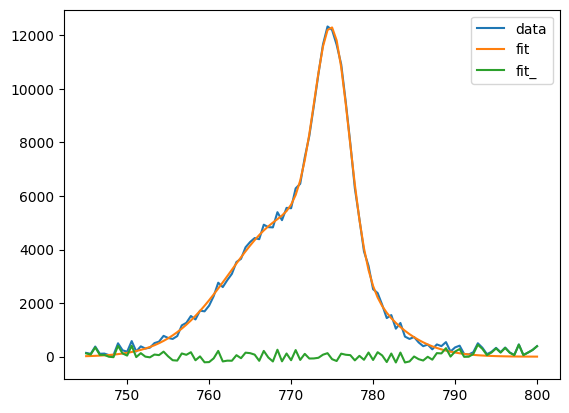

In [41]:
plt.plot(df["x"].values, df["y"].values, label="data")
plt.plot(df["x"].values, y_fit, label="fit")
plt.plot(df["x"].values, c, label="fit_")
plt.legend()

(array([12., 13.,  8., 13., 17., 19.,  6.,  4.,  3.,  5.]),
 array([-216.78478802, -150.03700887,  -83.28922971,  -16.54145056,
          50.2063286 ,  116.95410775,  183.70188691,  250.44966606,
         317.19744522,  383.94522437,  450.69300353]),
 <BarContainer object of 10 artists>)

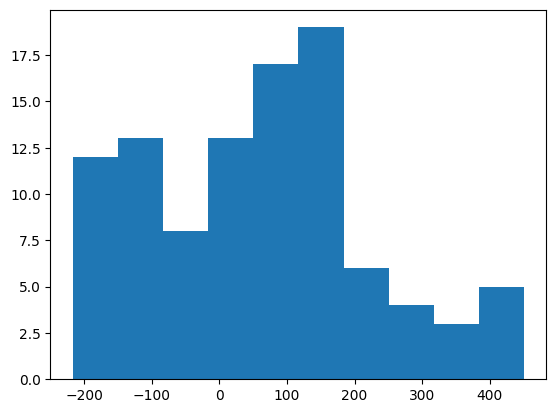

In [44]:
plt.hist(c, bins=10)